### Code to plot a telemetry profile - Running this notebook with plot the most recent saved data that you generated
#### 2021 0128 CJH
#### See telemetry_plot.ipynb for more information
---
* Imports a file with helper function definitions `import telemetry_plot_utils as tpu ` 
* Reads data from the robot/sim/data folder with `telemetry = tpu.load_file(file)`
* Converts that data to a useful pandas dataframe with `df = tpu.fix_data(telemetry)`
  * `df, telemetry = tpu.get_data(file_name='20210130_151440', x_offset=0, y_offset=0.0)` combines the load and table functions
* Gets a list of the pathweaver points with `df_points = tpu.get_points_df(name='bounce')`
* Plots them all together with plot_df, e.g. `tpu.plot_df(df_slalom_weave, telemetry_slalom_weave, point_df=df_slalom_points, background='slalom', arrows=True, save=False)`
* Plots the velocity profiles with e.g. `tpu.velocity_plot(df_slalom_weave)`

In [85]:
#from networktables import NetworkTables
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pickle
import glob
from importlib import reload

In [86]:
import telemetry_plot_utils as tpu 

### loading point lists from pathweaver files - use this explicitly if the 'guess' option fails
* just pass the function the unique part of the name of the file you want the points for and this gets plotted on the summary

In [87]:
path_weaver_files = data_files = glob.glob('../robot/pathweaver/paths/*')
print(path_weaver_files)

['../robot/pathweaver/paths\\barrel_pw0', '../robot/pathweaver/paths\\barrel_pw1', '../robot/pathweaver/paths\\barrel_test', '../robot/pathweaver/paths\\bounce_pw0', '../robot/pathweaver/paths\\bounce_pw1', '../robot/pathweaver/paths\\bounce_pw2', '../robot/pathweaver/paths\\bounce_pw3', '../robot/pathweaver/paths\\bounce_pw4', '../robot/pathweaver/paths\\calibrate', '../robot/pathweaver/paths\\calibrate_rev', '../robot/pathweaver/paths\\slalom_pw0', '../robot/pathweaver/paths\\slalom_pw1']


In [93]:
df_points = tpu.get_points_df(name='slalom')
df_points.head()

,X,Y,Tangent X,Tangent Y,Fixed Theta,Reversed,Name
0,1.100000,0.693851,1.496951,0.048044,True,False,NaN
1,2.155267,1.598042,0.495847,0.787522,True,False,NaN
2,3.255297,2.464733,0.773185,0.282648,True,False,NaN
3,4.567833,2.843910,0.900373,0.005905,False,False,NaN
4,5.956108,2.435268,0.736784,-0.433048,True,False,NaN


#### trick to get all four bounce paths in one point list

In [89]:
bounces = ['bounce_pw'+str(i+1) for i in range(4)]
dfs = []
for bounce_file in bounces:
    dfs.append(tpu.get_points_df(name=bounce_file))
df_bounce_points = pd.concat(dfs)
df_bounce_points

,X,Y,Tangent X,Tangent Y,Fixed Theta,Reversed,Name
0,1.100000,2.330814,2.337463,-0.004591,True,False,NaN
1,2.042570,2.711736,0.064046,0.128093,True,False,NaN
2,2.244029,3.125846,0.000103,0.100000,True,False,NaN
0,2.339525,3.277770,0.060000,0.600000,True,True,NaN
1,3.262517,1.435829,-0.715281,0.257468,True,True,NaN
2,4.527231,2.062590,-0.111922,-1.488558,True,True,NaN
3,4.661537,2.920000,0.000000,-0.010000,True,True,NaN
0,4.626897,3.120000,-0.009149,-0.320232,True,False,NaN
1,4.764139,1.502769,0.548969,-0.594717,True,False,NaN
2,5.780754,1.066487,0.570800,0.190267,True,False,NaN


---
#### Plot the most recent trajectory - you have to run the ramsete command and select "write_data" to be true in the dashboard to save data
* To plot something else, change the filename in tpu.getdata().  It defaults to finding the most recent file in robot/sim/data.
* Now it is guessing which set of points you need if you set `guess_points=True`.  Set to false and it will use the point_df you specify
* Don't use guess on bounce yet

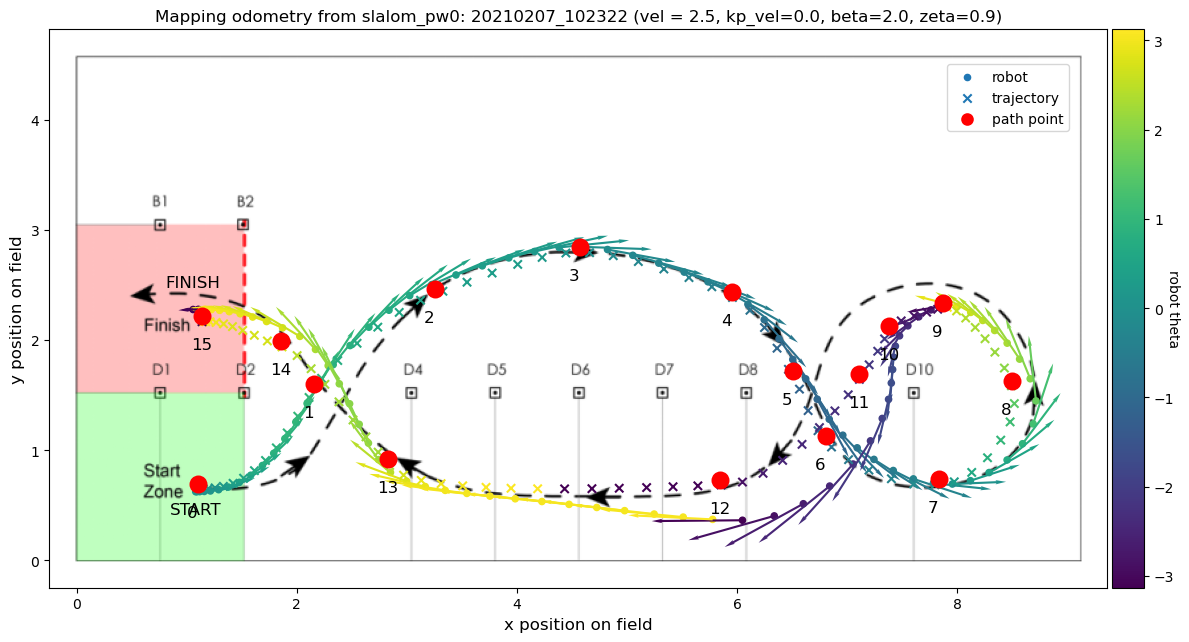

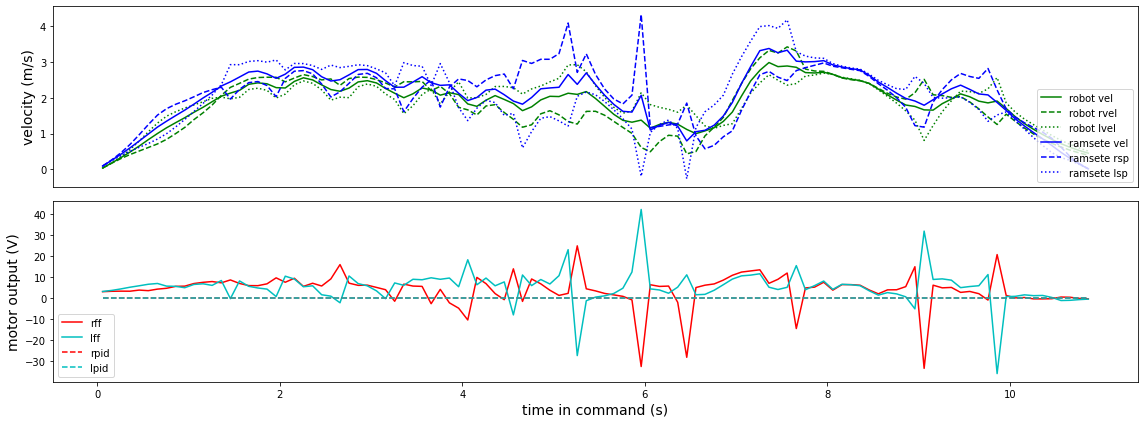

In [92]:
# get the latest trajectory
reload(tpu)
df_data, telemetry = tpu.get_data(file_name=None, x_offset=0, y_offset=0)
tpu.plot_df(df_data, telemetry, guess_points=True, point_df=df_points, background='slalom', arrows=True, save=False)
tpu.velocity_plot(df_data)